# diabetes-prediction-04

Installing the libraries

In [5]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Import Libraries

In [6]:
import time
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection
from sklearn.manifold import TSNE

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb





from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence

import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

##Data Cleaning

In [7]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [8]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [9]:
df.shape

(100000, 9)

In [10]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [11]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [12]:
df['age'] = df['age'].astype(int)

In [13]:
df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [14]:
df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [15]:
df = df.drop(columns = 'smoking_history')

In [16]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.875660,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.535417,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [17]:
df['blood_glucose_level'] =  df['blood_glucose_level'].astype(float)

In [18]:
df.dtypes

gender                  object
age                      int64
hypertension             int64
heart_disease            int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level    float64
diabetes                 int64
dtype: object

##Data Visualization

In [19]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.875660,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.535417,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


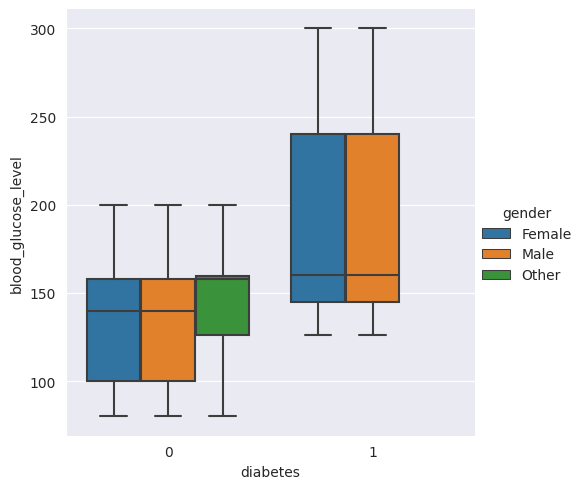

In [20]:
sns.catplot(data = df, x = 'diabetes', y = 'blood_glucose_level', kind = 'box', hue = 'gender')
plt.show()

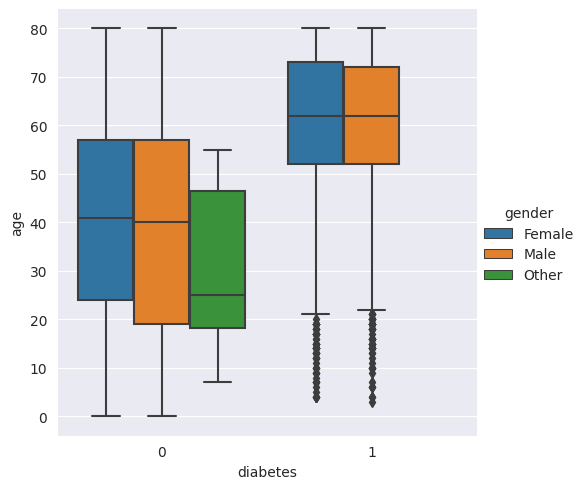

In [21]:
sns.catplot(data = df, x = 'diabetes', y = 'age', kind = 'box', hue = 'gender')
plt.show()

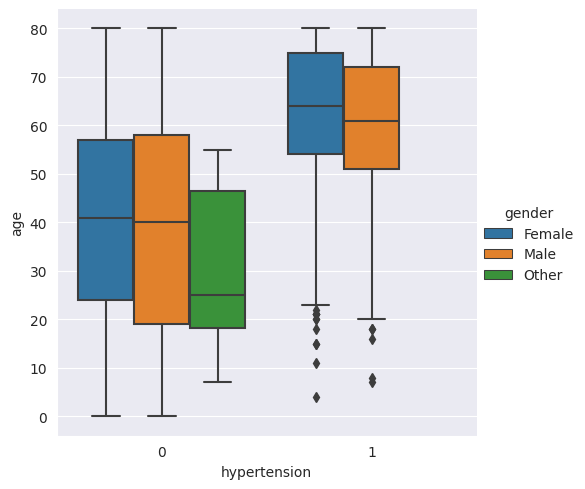

In [22]:
sns.catplot(data = df, x = 'hypertension', y = 'age', kind = 'box', hue = 'gender')
plt.show()

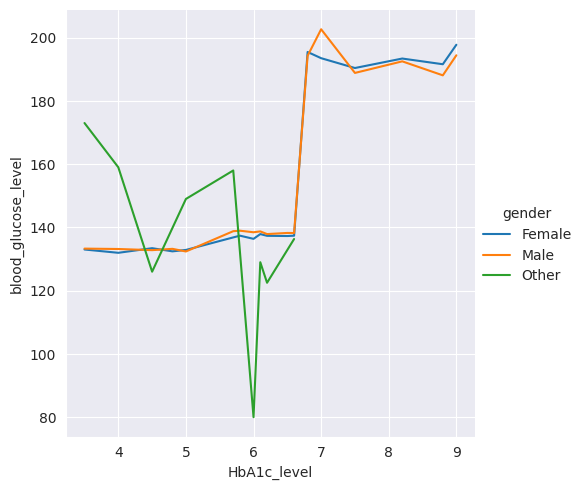

In [23]:
sns.relplot(data = df, x = 'HbA1c_level', y =  'blood_glucose_level', kind = 'line', hue = 'gender', ci = None, markers = True)
plt.show()

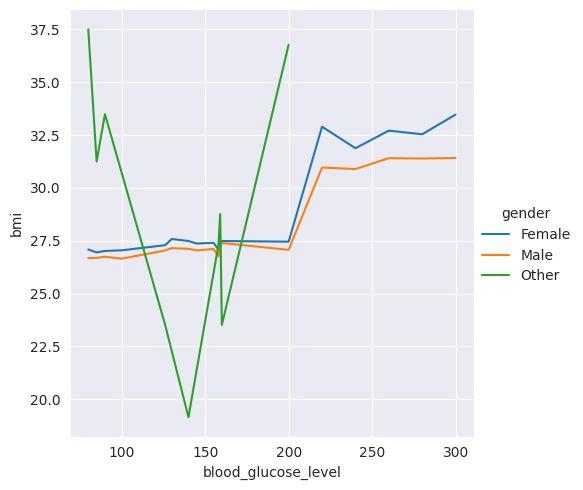

In [24]:
sns.relplot(data = df, x = 'blood_glucose_level', y =  'bmi', kind = 'line', hue = 'gender', ci = None)
plt.show()

In [25]:
df.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251093,0.233254,0.337747,0.101328,0.110631,0.257933
hypertension,0.251093,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233254,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337747,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101328,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110631,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.257933,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


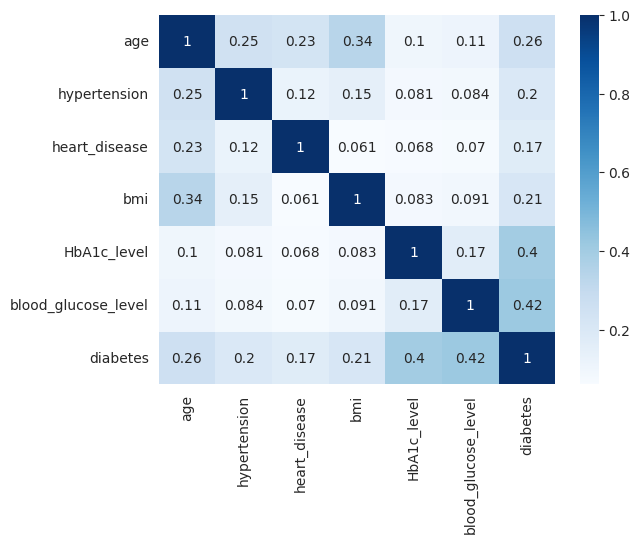

In [26]:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.show()

##Preparing Data for Modelling

In [27]:
design_matrix = df.iloc[:,:-1]
design_matrix = pd.get_dummies(design_matrix, columns= ['gender'], drop_first=True)
response_y = df.iloc[:,-1]

In [28]:
design_matrix

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other
0,80,0,1,25.19,6.6,140.0,0,0
1,54,0,0,27.32,6.6,80.0,0,0
2,28,0,0,27.32,5.7,158.0,1,0
3,36,0,0,23.45,5.0,155.0,0,0
4,76,1,1,20.14,4.8,155.0,1,0
...,...,...,...,...,...,...,...,...
99995,80,0,0,27.32,6.2,90.0,0,0
99996,2,0,0,17.37,6.5,100.0,0,0
99997,66,0,0,27.83,5.7,155.0,1,0
99998,24,0,0,35.42,4.0,100.0,0,0


In [29]:
response_y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(design_matrix, response_y, test_size = 0.2, random_state = 110)

In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80000, 8)
(80000,)
(20000, 8)
(20000,)


##Evaluating Machine Learning Classifiers
###K-Nearest Neighbors(KNN)

A non-parametric classifier that finds the K nearest neighbors to the query point and assigns the majority class label to the query point. It's a simple and intuitive method that works well for small datasets and can handle non-linear relationships between the features and the target class.

In [32]:
results = {}

In [33]:
%%time
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['K-Nearest Neighbors (KNN)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

accuracy_knn = accuracy_score(y_test, y_pred)

CPU times: user 1.39 s, sys: 2.94 ms, total: 1.4 s
Wall time: 1.43 s


In [36]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate specificity (true negative rate)
specificity_knn = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print("Specificity:", specificity_knn)

# Calculate sensitivity (true positive rate)
sensitivity_knn = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
print("Sensitivity:", sensitivity_knn)

Confusion Matrix:
 [[18230   102]
 [  736   932]]
Specificity: 0.9944359589788349
Sensitivity: 0.5587529976019184


###Decision Trees
A non-parametric classifier that models the decision rules as a tree. It's a powerful method that works well for both classification and regression problems. It's also easy to interpret the decision rules and the importance of the features.

In [37]:
%%time
start_time = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Decision Trees'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 225 ms, sys: 632 µs, total: 226 ms
Wall time: 227 ms


In [38]:
accuracy_dt = accuracy_score(y_test, y_pred)

In [39]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate specificity (true negative rate)
specificity_dt = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print("Specificity:", specificity_dt)

# Calculate sensitivity (true positive rate)
sensitivity_dt = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
print("Sensitivity:", sensitivity_dt)

Confusion Matrix:
 [[17847   485]
 [  470  1198]]
Specificity: 0.9735435304385773
Sensitivity: 0.7182254196642686


###Random Forest
An ensemble method that combines multiple decision trees by aggregating their predictions. It's a powerful and robust method that works well for high-dimensional problems and can handle non-linear relationships between the features and the target class.

In [40]:
%%time
start_time = time.time()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Random Forest'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 6.33 s, sys: 25.1 ms, total: 6.35 s
Wall time: 6.4 s


In [41]:
accuracy_rf = accuracy_score(y_test, y_pred)
accuracy_rf

0.96805

In [42]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate specificity (true negative rate)
specificity_rf = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print("Specificity:", specificity_rf)

# Calculate sensitivity (true positive rate)
sensitivity_rf = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
print("Sensitivity:", sensitivity_rf)

Confusion Matrix:
 [[18228   104]
 [  535  1133]]
Specificity: 0.9943268601352826
Sensitivity: 0.6792565947242206


###Support Vector Machines (SVM)

A linear or non-linear classifier that finds the hyperplane that maximizes the margin between the classes. It's a powerful method that works well for both linearly and non-linearly separable problems. It's also less prone to overfitting than other methods.

In [ ]:
%%time
start_time = time.time()
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Support Vector Machines'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

In [44]:
accuracy_svm = accuracy_score(y_test, y_pred)

In [45]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate specificity (true negative rate)
specificity_svm = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print("Specificity:", specificity_svm)

# Calculate sensitivity (true positive rate)
sensitivity_svm = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
print("Sensitivity:", sensitivity_svm)

Confusion Matrix:
 [[18332     0]
 [ 1023   645]]
Specificity: 1.0
Sensitivity: 0.38669064748201437


###XGBoost

An optimized implementation of gradient boosting that uses a parallelized tree construction algorithm and a novel regularization method. It's a state-of-the-art method that works well for large datasets and can handle non-linear relationships between the features and the target class.

In [46]:
%%time
start_time = time.time()
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['XGBoost'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 9.14 s, sys: 22.1 ms, total: 9.16 s
Wall time: 4.76 s


In [47]:
accuracy_xg = accuracy_score(y_test, y_pred)

In [48]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate specificity (true negative rate)
specificity_xg = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print("Specificity:", specificity_xg)

# Calculate sensitivity (true positive rate)
sensitivity_xg = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
print("Sensitivity:", sensitivity_xg)

Confusion Matrix:
 [[18294    38]
 [  530  1138]]
Specificity: 0.9979271219725071
Sensitivity: 0.6822541966426858


In [54]:
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])

df_results

,Accuracy,Precision,Recall,F1-Score,Training Time
K-Nearest Neighbors (KNN),0.95810,0.956203,0.95810,0.953540,1.388789
Decision Trees,0.95225,0.952447,0.95225,0.952347,0.203623
Random Forest,0.96805,0.966853,0.96805,0.965865,6.374558
Support Vector Machines,0.94885,0.951554,0.94885,0.938233,55.444791
XGBoost,0.97160,0.971498,0.97160,0.969331,4.738342


###Ensemble

In [60]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

# Create individual classifiers
rf_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier(n_neighbors=11)
svm_clf = SVC()
xgb_clf = xgb.XGBClassifier()
dt_clf = DecisionTreeClassifier()

# Create the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('rf', rf_clf), ('knn', knn_clf), ('svm', svm_clf), ('xgboost', xgb_clf), ('dt', dt_clf)],
    voting='hard'  # Use majority voting
)

# Fit the Voting Classifier to the training data
voting_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_clf.predict(X_test)

# Calculate accuracy
accuracy_ensemble1 = accuracy_score(y_test, y_pred)
print("Ensemble Accuracy:", accuracy_ensemble1)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate specificity (true negative rate)
specificity_ensemble1 = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print("Specificity:", specificity_ensemble1)

# Calculate sensitivity (true positive rate)
sensitivity_ensemble1 = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
print("Sensitivity:", sensitivity_ensemble1)

Ensemble Accuracy: 0.9715
Confusion Matrix:
 [[18317    15]
 [  555  1113]]
Specificity: 0.999181758673358
Sensitivity: 0.6672661870503597


In [57]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

In [61]:
n_estimators = 10  # Number of base models

ensemble_model = BaggingClassifier(base_estimator=None, n_estimators=n_estimators)
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy_ensemble2 = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_ensemble2)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
# Calculate specificity (true negative rate)
specificity_ensemble2 = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print("Specificity:", specificity_ensemble2)

# Calculate sensitivity (true positive rate)
sensitivity_ensemble2 = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
print("Sensitivity:", sensitivity_ensemble2)

Accuracy: 0.96655
Precision: 0.8845265588914549
Recall: 0.6888489208633094
F1 Score: 0.7745197168857432
Confusion Matrix:
 [[18182   150]
 [  519  1149]]
Specificity: 0.9918175867335807
Sensitivity: 0.6888489208633094


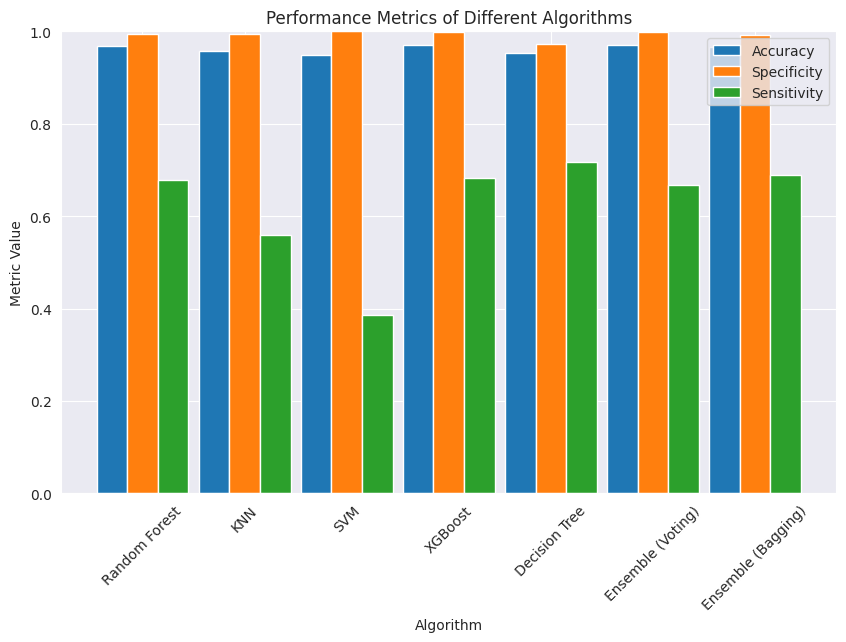

In [62]:
import matplotlib.pyplot as plt

# Define the algorithm names and their corresponding accuracies, specificity, and sensitivity
algorithm_names = ['Random Forest', 'KNN', 'SVM', 'XGBoost', 'Decision Tree', 'Ensemble (Voting)', 'Ensemble (Bagging)']
accuracies = [accuracy_rf, accuracy_knn, accuracy_svm, accuracy_xg, accuracy_dt, accuracy_ensemble1, accuracy_ensemble2]
specificities = [specificity_rf, specificity_knn, specificity_svm, specificity_xg, specificity_dt, specificity_ensemble1, specificity_ensemble2]
sensitivities = [sensitivity_rf, sensitivity_knn, sensitivity_svm, sensitivity_xg, sensitivity_dt, sensitivity_ensemble1, sensitivity_ensemble2]

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.3

plt.bar([i - bar_width for i in range(len(algorithm_names))], accuracies, width=bar_width, label='Accuracy')
plt.bar(range(len(algorithm_names)), specificities, width=bar_width, label='Specificity')
plt.bar([i + bar_width for i in range(len(algorithm_names))], sensitivities, width=bar_width, label='Sensitivity')

plt.xlabel('Algorithm')
plt.ylabel('Metric Value')
plt.title('Performance Metrics of Different Algorithms')
plt.ylim([0, 1])  # Set the y-axis limits
plt.xticks(range(len(algorithm_names)), algorithm_names, rotation=45)  # Set x-axis labels
plt.legend()
plt.show()